In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from copy import deepcopy

In [2]:
# Load data
with open(r'\\10.16.57.94\dataset1\xinke\Danmu\DyEmo-submit\DyEmo-Forrest\Emotion_scores\scores_longMovie_gpt3_5_turbo.pkl', 'rb') as f:
    scores_allvideo = pickle.load(f)
print(scores_allvideo.keys())
preds = scores_allvideo['forrest_gump']

with open(r'\\10.16.57.94\dataset1\xinke\Danmu\DyEmo-submit\DyEmo-Forrest\Processed_danmu\danmu_Forrest_Gump_downsample.pkl', 'rb') as f:
    danmu_dict = pickle.load(f)
time_ranges = danmu_dict['forrest_gump.csv_time_range']

time_points = np.zeros(len(time_ranges))
for i in range(len(time_points)):
    time_points[i] = np.mean(time_ranges[i])

dict_keys(['error_count_list', 'forrest_gump'])


In [3]:
# Smooth data
smooth_win = 10
preds_smoothed_bilibili = np.zeros(preds.shape)
for i in range(preds.shape[0]):
    tmp = preds[abs(time_points - time_points[i]) <= smooth_win//2, :]
    preds_smoothed_bilibili[i,:] = np.mean(tmp[np.sum(np.abs(tmp), axis=1)!=0, :], axis=0)
print(preds.shape)

(5756, 6)


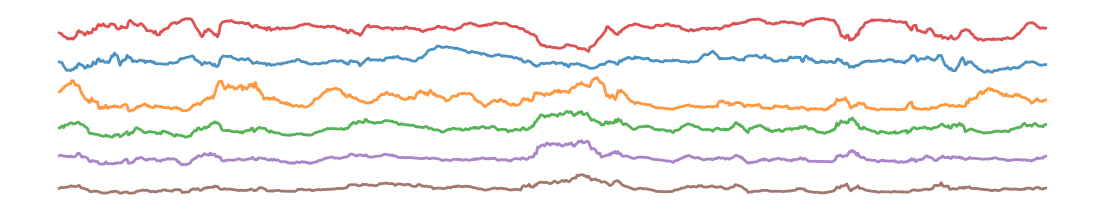

In [4]:
# Plot illustration of the curves
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14, 2.5))
ax = fig.add_subplot(111)
plt.rcParams['font.family'] = 'Arial'
interval = 4.5

emos = ["Happiness", "Surprise", "Sadness", "Anger", "Disgust", "Fear"]

colors = ['#d62728', '#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b']
for j in range(6):
    y_offset = interval * (5 - j)
    ax.plot(preds_smoothed_bilibili[500:1200, j] + y_offset, color=colors[j], alpha=0.8, linewidth=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_yticks([])
ax.set_xticks([])
ax.tick_params(axis='both', length=0)

plt.show()

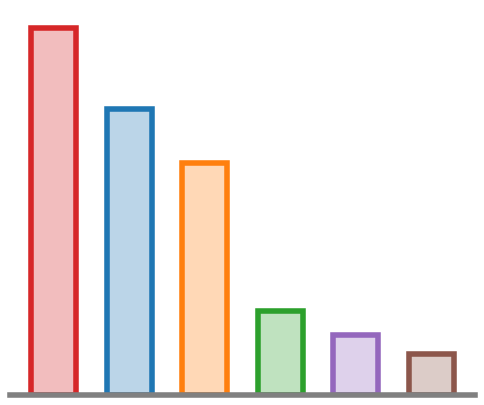

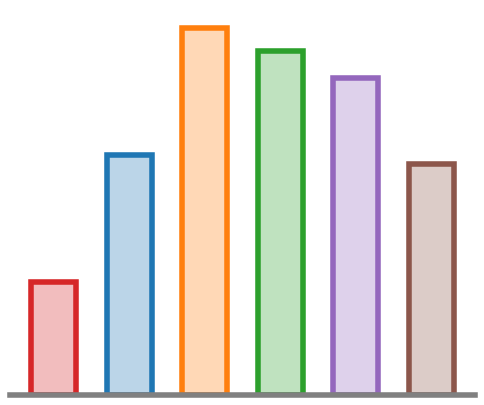

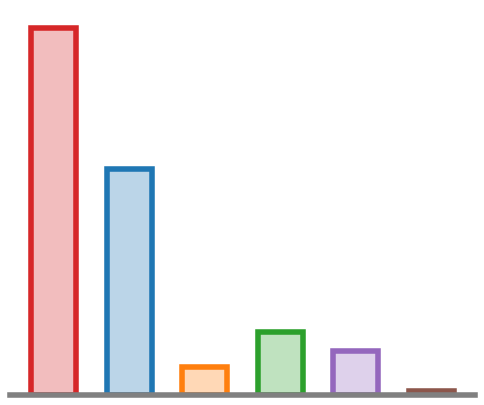

In [5]:
import matplotlib.colors as mcolors

facecolors = [mcolors.to_rgba(color, alpha=0.3) for color in colors]  
edgecolors = colors  

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.bar(np.arange(6), preds_smoothed_bilibili[500+118, :], edgecolor=edgecolors, color=facecolors, width=0.6, linewidth=4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.spines['bottom'].set_linewidth(4)
ax.set_yticks([])
ax.set_xticks([])
plt.show()

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.bar(np.arange(6), preds_smoothed_bilibili[500+370, :], edgecolor=edgecolors, color=facecolors, width=0.6, linewidth=4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.spines['bottom'].set_linewidth(4)
ax.set_yticks([])
ax.set_xticks([])
plt.show()

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.bar(np.arange(6), preds_smoothed_bilibili[500+540, :], edgecolor=edgecolors, color=facecolors, width=0.6, linewidth=4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.spines['bottom'].set_linewidth(4)
ax.set_yticks([])
ax.set_xticks([])
plt.show()

In [6]:
import pickle
with open(r'\\10.16.57.94\dataset1\xinke\Danmu\DyEmo-submit\DyEmo-Forrest\Online_human_ratings_danmu\ratings6_sorted_final_12sub.pkl', 'rb') as f:
    data = pickle.load(f)
    
import numpy as np
data_keys = list(data.keys())
time_points = np.zeros(len(data_keys))
ratings_danmu_mean = np.zeros((len(data_keys), 6))
for i in range(len(data_keys)):
    time_points[i] = data_keys[i]
    ratings_danmu_mean[i,:] = np.mean(np.array(data[data_keys[i]]), axis=1)
    
from scipy import stats
import h5py
# load ratings
path=r'\\10.16.57.94\dataset1\xinke\Danmu\DyEmo-submit\Lettieri-Forrest\forrest_gump_movie_italian\raw_ratings.mat'
ratings_all=np.zeros([12,6,3599])
count = 0
with h5py.File(path,'r') as file:
    for item in file.items():
        # print(item[0])
        tmp = file[item[0]][:][[0,1,3,4,5,2],:] # reorder to [高兴、惊讶、悲伤、愤怒、厌恶、恐惧]
        ratings_all[count]=tmp
        count += 1
ratings_movie_mean = np.mean(ratings_all, axis=0)
ratings_movie_mean = ratings_movie_mean.transpose()

In [7]:
# Align the Bilibili version to German version (for aligning with human ratings for the movie)

# cut predicted scores and time_points_german into 8 runs
cut_index2 = [[0, 22550/25], [22150/25, 32312/25], [36349/25, 48237/25], [47837/25, 57798/25], [58470/25, 70409/25], [70009/25, 85997/25], [89293/25, 97705/25], [97305/25, 117351/25], [120616/25, 123670/25], [123270/25, 141457/25], [145869/25, 149632/25], [149232/25, 152260/25], [154244/25, 178316/25],  [177916/25, 194792/25]]
time_points = np.zeros(len(time_ranges)) # time points in Bilibili
for i in range(len(time_points)):
    time_points[i] = np.mean(time_ranges[i])
    
print(len(time_points))
print(time_points[618]) # 833s

# Downsample
time_points = time_points[np.arange(0,5756,5)] # rate per 5 danmu groups

time_points_ori = deepcopy(time_points)
time_points_ori[time_points_ori>=4443] = time_points_ori[time_points_ori>=4443] + (4462-4443)
time_points_ori[time_points_ori>=4483] = time_points_ori[time_points_ori>=4483] + (4514-4483)
time_points_ori[time_points_ori>=5177] = time_points_ori[time_points_ori>=5177] + (5210-5177)
time_points_ori[time_points_ori>=5371] = time_points_ori[time_points_ori>=5371] + (5380-5371) # time points in the version without cuts

# Find time points in the german version. (the frame rate was different from the original movie)
time_points_german = time_points_ori / (25/(24000/1001))

preds_cut = np.zeros((0,6))
time_points_german_cut = np.zeros(0)
for i in range(len(cut_index2)):
    preds_cut = np.concatenate((preds_cut, ratings_danmu_mean[(time_points_german >= cut_index2[i][0]) & (time_points_german <= cut_index2[i][1]), :]), 0)
    time_points_german_cut = np.concatenate((time_points_german_cut, time_points_german[(time_points_german >= cut_index2[i][0]) & (time_points_german <= cut_index2[i][1])]), 0)

# Get time of ratings in German version
time_ratings = []
seg_lens = [902,882,876,976,924,878,1084,676]
for i in range(8):
    tmp = np.arange(0,seg_lens[i],2)
    if (i > 0) and (i < 7): # The first and the last runs only have one segment
        tmp = tmp + cut_index2[i*2-1][0]
        tmp[tmp > cut_index2[i*2-1][1]]  = tmp[tmp > cut_index2[i*2-1][1]] + cut_index2[i*2][0] - cut_index2[i*2-1][1] # Add skipped time
    elif i == 7:
        tmp = tmp + cut_index2[i*2-1][0]
    time_ratings.extend(tmp)
    
# Resample preds_cut to the same sampling rate of ratings_mean (by average over 2s neighboring to time_ratings)
preds_cut_resample = np.zeros((3599, 6))
for i in range(3599):
    if np.sum((time_points_german_cut < (time_ratings[i]+1)) & (time_points_german_cut >= (time_ratings[i]-1)))==0:
        preds_cut_resample[i,:] = preds_cut_resample[i-1,:]
    else:
        preds_cut_resample[i,:] = np.mean(preds_cut[(time_points_german_cut < (time_ratings[i]+1)) & (time_points_german_cut >= (time_ratings[i]-1)),:], axis=0)

danmu_human_ratings = deepcopy(preds_cut_resample)

5756
833.0


In [8]:
# Map the German time points (time_ratings) resampled to 0.5Hz back to the time points (time_points) in Bilibili.    
print(np.max(time_ratings))
print(time_points[618] / (25/(24000/1001)))
print(time_points[870] / (25/(24000/1001)))
print(time_points[1040] / (25/(24000/1001)))
print(np.where((np.array(time_ratings)>=798)&(np.array(time_ratings)<800)))
print(np.where((np.array(time_ratings)>=1085)&(np.array(time_ratings)<1087)))
print(np.where((np.array(time_ratings)>=1288)&(np.array(time_ratings)<1290)))

7790.64
4260.05994005994
6200.1998001998
7304.055944055944
(array([399], dtype=int64),)
(array([551], dtype=int64),)
(array([652], dtype=int64),)


In [9]:
# Smooth the predicted scores over Ts windows
smooth_win = 10
danmu_human_smoothed = np.zeros(danmu_human_ratings.shape)
for i in range(danmu_human_ratings.shape[0]):
    tmp = danmu_human_ratings[abs(time_ratings - time_ratings[i]) <= smooth_win//2, :]
    danmu_human_smoothed[i,:] = np.mean(tmp[np.sum(np.abs(tmp), axis=1)!=0, :], axis=0)
    
ratings_smoothed = np.zeros(preds_cut_resample.shape)
for i in range(ratings_smoothed.shape[0]):
    tmp = ratings_movie_mean[abs(time_ratings - time_ratings[i]) <= smooth_win//2, :]
    ratings_smoothed[i,:] = np.mean(tmp, axis=0)

In [10]:
print(np.where(np.arange(0,5756,5)==620))
print(np.where(np.arange(0,5756,5)==870))
print(np.where(np.arange(0,5756,5)==1040))

(array([124], dtype=int64),)
(array([174], dtype=int64),)
(array([208], dtype=int64),)


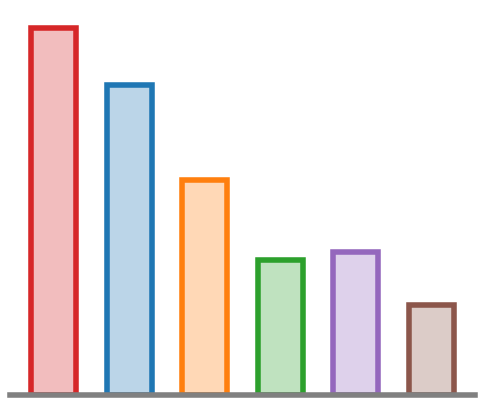

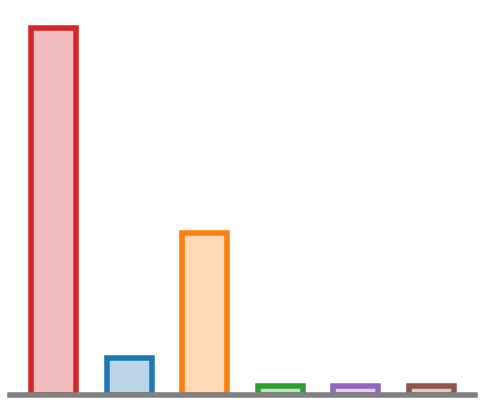

In [11]:
import matplotlib.colors as mcolors

facecolors = [mcolors.to_rgba(color, alpha=0.3) for color in colors]  
edgecolors = colors  

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.bar(np.arange(6), danmu_human_smoothed[399, :], color=facecolors, edgecolor=edgecolors, width=0.6, linewidth=4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.spines['bottom'].set_linewidth(4)
ax.set_yticks([])
ax.set_xticks([])
plt.savefig('figures/huamn_danmu_illus.svg')
plt.show()

tmp = deepcopy(ratings_smoothed[399,:])
tmp[3:] = tmp[3:] + 0.8
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.bar(np.arange(6), tmp, color=facecolors, edgecolor=edgecolors, width=0.6, linewidth=4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.spines['bottom'].set_linewidth(4)
ax.set_yticks([])
ax.set_xticks([])
plt.savefig('figures/huamn_movie_illus.svg', dpi=300, bbox_inches='tight')
plt.show()

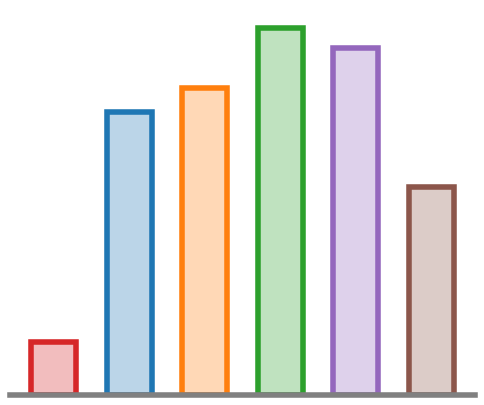

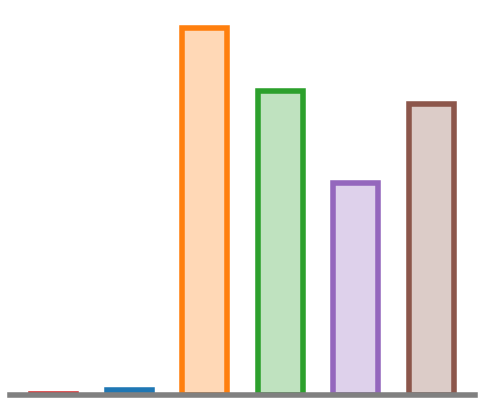

In [12]:
import matplotlib.colors as mcolors

facecolors = [mcolors.to_rgba(color, alpha=0.3) for color in colors]  

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.bar(np.arange(6), danmu_human_smoothed[551, :], color=facecolors, edgecolor=edgecolors, width=0.6, linewidth=4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.spines['bottom'].set_linewidth(4)
ax.set_yticks([])
ax.set_xticks([])
plt.show()

tmp = ratings_smoothed[551,:] 
tmp[3:] = tmp[3:] + 0.2
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.bar(np.arange(6), tmp, color=facecolors, edgecolor=edgecolors, width=0.6, linewidth=4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.spines['bottom'].set_linewidth(4)
ax.set_yticks([])
ax.set_xticks([])
plt.show()

### t-sne

1.26.4


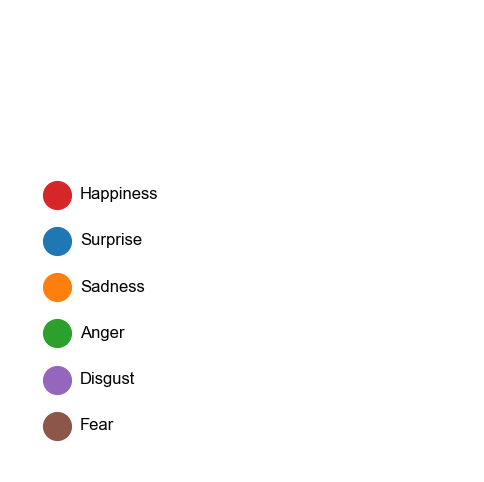

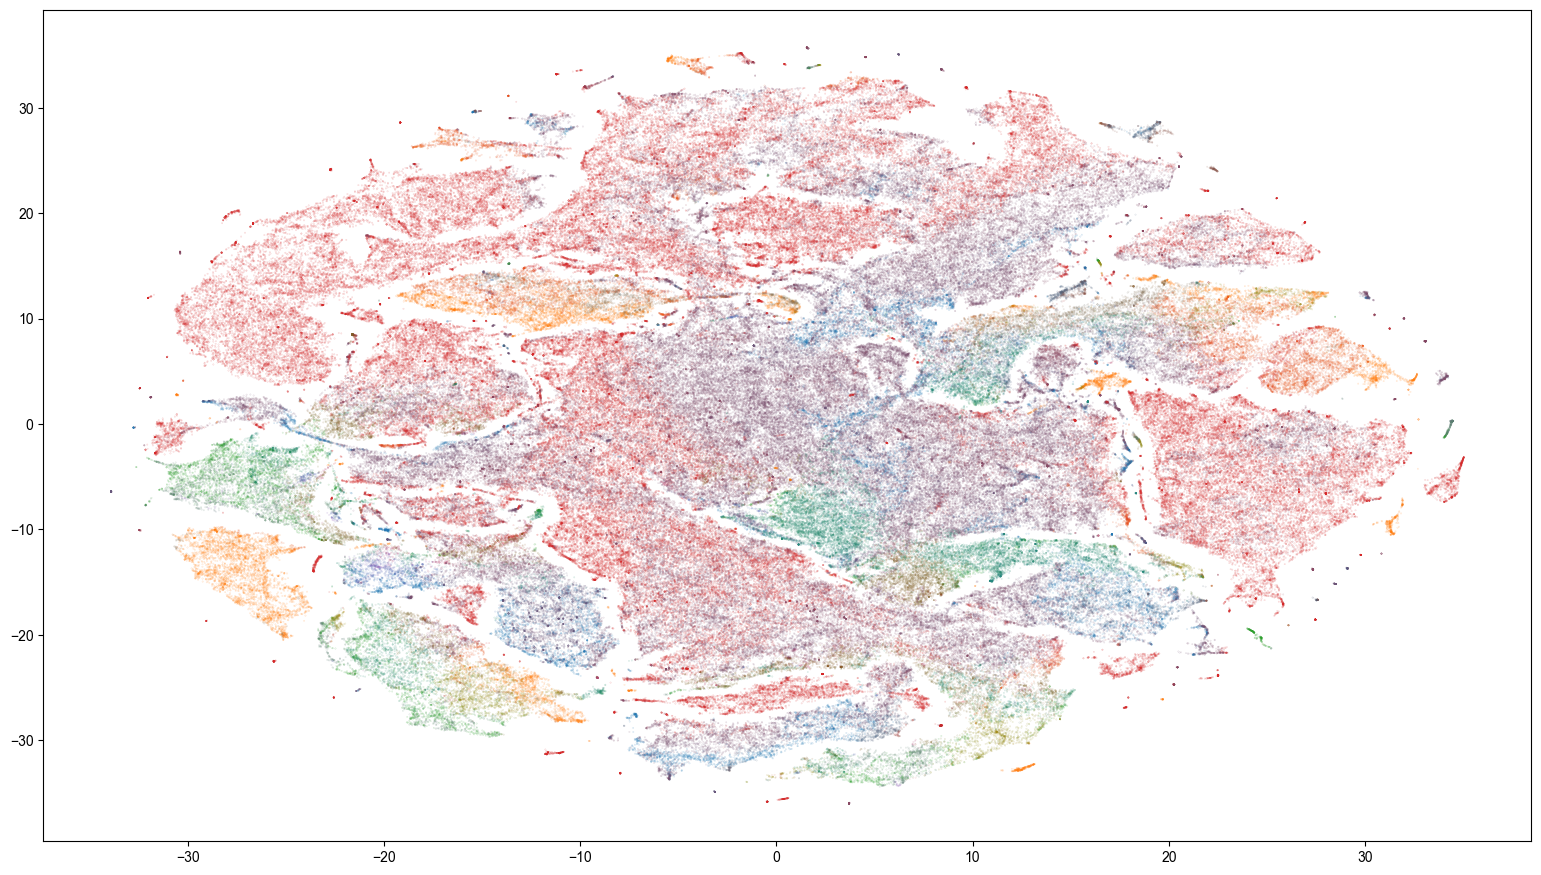

(378665, 2)


In [15]:
import pickle
import numpy as np
print(np.__version__)
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os
import matplotlib.colors as mcolors
from matplotlib.colors import hsv_to_rgb
from matplotlib.colors import rgb2hex, to_rgba


def TSNE_2d(directory):
    with open(os.path.join(directory, 'all_data.pkl'), 'rb') as file:
        movie_data = pickle.load(file)
    chn_data = np.load('./data/preds_smoothed_chin.npy')
    jpn_data = np.load('./data/preds_smoothed_japa.npy')
    combined_array = np.concatenate([movie_data, chn_data, jpn_data], axis=0)
    tsne = TSNE(n_components=2, random_state=42)
    data_combined_2d = tsne.fit_transform(combined_array)
    with open(os.path.join(directory, 'all_data_plusAnime.pkl'), 'wb') as file:
        pickle.dump(combined_array, file)
    with open(os.path.join(directory, 'all_data_plusAnime_2d.pkl'), 'wb') as file:
        pickle.dump(data_combined_2d, file)

def movie_info(directory):
    with open(os.path.join(directory, 'scores_allMovies_resample.pkl'), 'rb') as file:
        combined_array = pickle.load(file)  # (82980,6)
    arrays = list(combined_array.values())
    id = list(combined_array.keys())
    movie_lengths = [len(sublist) for sublist in arrays]
    return movie_lengths, id

def colorCalculator6(data_combined):
    """
     colors based on top2 dominant emotions
     """
    colors = []
    colors_hex = ['#d62728', '#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b']
    colors_rgb = [mcolors.hex2color(color) for color in colors_hex]

    for i in range(data_combined.shape[0]):
        rate = data_combined[i, :]
        top1_index = np.argmax(rate)
        top1 = rate[top1_index]
        rate_dup = rate.copy()
        rate_dup[top1_index] = 0
        top2_index = np.argmax(rate_dup)
        top2 = rate[top2_index]
        if top1 - top2 > 1:
            weights = np.repeat(0, 6)
            weights[top1_index] = 1
            if np.sum(rate) == 0:
                weights = np.repeat(1, 6)
            mixed_color_rgb = tuple(
                sum(w * rgb[i] for w, rgb in zip(weights, colors_rgb)) / sum(weights) for i in range(3))
            colors.append(mixed_color_rgb)
        else:
            if np.sum(rate) == 0:
                weights = np.repeat(1, 6)
            else:
                weights = np.repeat(0, 6)
                weights[top2_index] = top2
                weights[top1_index] = top1
            mixed_color_rgb = tuple(
                sum(w * rgb[i] for w, rgb in zip(weights, colors_rgb)) / sum(weights) for i in range(3))
            colors.append(mixed_color_rgb)
    return colors


def plot_grad_6d(data_combined_2d, data_combined, output_path, save = False, dpi=300):
    """
    data_combined_2d (n_points, 2)
    """
    colors = colorCalculator6(data_combined)
    fig, ax = plt.subplots(figsize=(19.2, 10.8))  # 设置为全屏大小，1920x1080 分辨率
    ax.scatter(data_combined_2d[:, 0], data_combined_2d[:, 1], alpha=0.3, s=0.05, c=colors)
    if save:
        plt.savefig(output_path, dpi=dpi, bbox_inches='tight')
    plt.show()
    

def plot_colored_dots(points, colors, labels):
    """
    points (list of tuples)
    colors (list of str)
    labels (list of str)
    """
    plt.figure(figsize=(6, 6))

    for (x, y), color, label in zip(points, colors, labels):
        plt.plot(x, y, 'o', color=color, markersize=20)
        plt.text(x + 0.05, y, label, fontsize=12, verticalalignment='center')

    plt.axis('off')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.show()

def start_and_end(movie):
    movie_lenths, movie_names = movie_info(directory)
    movie_names.append('anime_chn')
    movie_names.append('anime_jpn')
    movie_lenths.append(9139)
    movie_lenths.append(9139)
    # print(movie_names[movie])
    end = 0
    for i in range(movie + 1):
        end += movie_lenths[i]
    end -= 1
    start = end - movie_lenths[movie] + 1
    return start, end

directory = r'\\10.16.57.94\dataset1\xinke\Danmu\DyEmo-submit\auxiliary'

with open(os.path.join(directory, 'all_data_plusAnime_2d.pkl'), 'rb') as file:
    data_combined_2d = pickle.load(file)
with open(os.path.join(directory, 'all_data_plusAnime.pkl'), 'rb') as file:
    data_combined = pickle.load(file)

points = [(0.1, 0.6), (0.1, 0.5), (0.1, 0.4), (0.1, 0.3), (0.1, 0.2), (0.1, 0.1)]
colors_hex = ['#d62728', '#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b']
colors = [mcolors.hex2color(color) for color in colors_hex]
plot_colored_dots(points, colors, ["Happiness", "Surprise", "Sadness", "Anger", "Disgust", "Fear"])

output_path = os.path.join(directory, 'scatter_plot_high_res.png')
plot_grad_6d(data_combined_2d, data_combined, output_path,save=True,dpi=600)

print(data_combined_2d.shape)

movie = 1
movie_lenths, movie_names = movie_info(directory)
movie_names.append('anime_chn')
movie_names.append('anime_jpn')
movie_lenths.append(9139)
movie_lenths.append(9139)
start, end = start_and_end(movie)

In [18]:
with open(r'\\10.16.57.94\dataset1\xinke\Danmu\DyEmo-submit\auxiliary\all_data_2d.pkl', 'rb') as f:
    all_data_2d = pickle.load(f)
print(all_data_2d.shape)

(360387, 2)


In [20]:
print(360387*20, 378665*20)

7207740 7573300


In [ ]:
# print((378665-360387)/20/60)

30.46333333333333


In [ ]:
# 7091360/20

354568.0